CNN Predictive Model for Image Classification using PyTorch
---

This is the predictive model for image classification by using the images dataset from Kaggle - [Images dataset of Natural Images](https://www.kaggle.com/prasunroy/natural-images)

This is the Image Classification/Identification project I have worked on to predict the input image received by the model, reference and course I took from JovianML platform (its link provided at the summary).

Here I have used Python, PyTorch and Jupyter Notebook to build and train the predictive modelling with CNN architecture.

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
# !pip install jovian --upgrade -q
# import jovian
# jovian.utils.colab.set_colab_file_id('1YvaAa3jMvmpwTEMYG6_SBwEBDPS4N58O')

In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od

In [ ]:
ds_url = 'https://www.kaggle.com/prasunroy/natural-images'

In [ ]:
od.download('https://www.kaggle.com/prasunroy/natural-images')

In [ ]:
import os
import pandas as pd
import numpy as np
import torch
from torch.utils.data import random_split, DataLoader

## Exploring Dataset:

In [ ]:
print(os.listdir('natural-images/natural_images'))

['airplane', 'flower', 'cat', 'motorbike', 'car', 'dog', 'person', 'fruit']


In [ ]:
dataset_classes = os.listdir('natural-images/natural_images')
dataset_classes

['airplane', 'flower', 'cat', 'motorbike', 'car', 'dog', 'person', 'fruit']

In [ ]:
len(os.listdir('natural-images/natural_images/airplane'))

556

Note:
- **'natural-images/natural_images'** is the training dataset
- **'natural-images/test_natural_images_ds'** is the testing dataset

In [ ]:
# Overall image objects available from this dataset:

base_dataset = len(os.listdir('natural-images/data/natural_images/airplane')) + len(os.listdir('natural-images/data/natural_images/car')) + len(os.listdir('natural-images/data/natural_images/cat')) + len(os.listdir('natural-images/data/natural_images/dog')) + len(os.listdir('natural-images/data/natural_images/flower')) + len(os.listdir('natural-images/data/natural_images/fruit')) + len(os.listdir('natural-images/data/natural_images/motorbike')) + len(os.listdir('natural-images/data/natural_images/person'))
base_dataset

6899

In [ ]:
# I have considered Testing dataset 20%:

test_ds = int(0.2 * base_dataset)
test_ds

1379

Split the dataset into training and testing datasets using random_split function from torch.utils.data package:

In [ ]:
# To calculate validation size:

val_percentage = 0.1
val_ds = int(base_dataset * val_percentage)
val_ds

689

In [ ]:
# To calculate training size:

training_ds = int(base_dataset - test_ds - val_ds)
training_ds

4831

In [ ]:
len(os.listdir('natural-images/test_natural_images_ds/person'))

172

To convert imges into PyTorch Tensor, we can use ImageFolder class from 'torchvision':

In [ ]:
import torchvision
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torchvision import transforms

In [ ]:
# Computing the total number of objects in 'natural_images' folder for training:

training_dataset = len(os.listdir('natural-images/natural_images/airplane')) + len(os.listdir('natural-images/natural_images/car')) + len(os.listdir('natural-images/natural_images/cat')) + len(os.listdir('natural-images/natural_images/dog')) + len(os.listdir('natural-images/natural_images/flower')) + len(os.listdir('natural-images/natural_images/fruit')) + len(os.listdir('natural-images/natural_images/motorbike')) + len(os.listdir('natural-images/natural_images/person'))
training_dataset

5534

In [ ]:
# Computing the total number of objects in 'test_natural_images_ds' for testing:

testing_dataset = len(os.listdir('natural-images/test_natural_images_ds/airplane')) + len(os.listdir('natural-images/test_natural_images_ds/car')) + len(os.listdir('natural-images/test_natural_images_ds/cat')) + len(os.listdir('natural-images/test_natural_images_ds/dog')) + len(os.listdir('natural-images/test_natural_images_ds/flower')) + len(os.listdir('natural-images/test_natural_images_ds/fruit')) + len(os.listdir('natural-images/test_natural_images_ds/motorbike')) + len(os.listdir('natural-images/test_natural_images_ds/person'))
testing_dataset

1376

We can use the ImageFolder class from torchvision to load the data as PyTorch tensors.

In [ ]:
dataset = ImageFolder('natural-images/natural_images', transform=ToTensor())
# dataset

In [ ]:
# To transform all the image tensors into same size for training:
# All images should be equal size for printing the batch.

img_size = 32, 32

dataset_2 = ImageFolder('natural-images/natural_images', transform=transforms.Compose([transforms.Resize(img_size), transforms.ToTensor()]))

In [ ]:
dataset_2

Dataset ImageFolder
    Number of datapoints: 5526
    Root location: natural-images/natural_images
    StandardTransform
Transform: Compose(
               Resize(size=(32, 32), interpolation=PIL.Image.BILINEAR)
               ToTensor()
           )

In [ ]:
testing_dataset_tensor = ImageFolder('natural-images/test_natural_images_ds', transform=ToTensor())
testing_dataset_tensor

Dataset ImageFolder
    Number of datapoints: 1373
    Root location: natural-images/test_natural_images_ds
    StandardTransform
Transform: ToTensor()

In [ ]:
img, label = dataset[603]
img

print(img.shape, label)

torch.Size([3, 100, 100]) 1


In [ ]:
img, label = dataset[2]
print(img.shape, label)

torch.Size([3, 94, 290]) 0


In [ ]:
# Check if data from dataset_2 image size is 224X224:

img, label = dataset_2[90]
print(img.shape, label)

torch.Size([3, 32, 32]) 0


In [ ]:
# '.classes' property helps to know the categories/classifiers available from the above dataset.

dataset.classes

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']

In [ ]:
dataset_2.classes

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

### Creating helper function to view the sample data from the dataset:

In [ ]:
# Creating helper function below to view the images from the dataset using matplotlib:

def show_example(img, label):
    print('Class: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Class:  car (1)


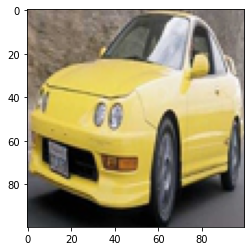

In [ ]:
show_example(*dataset[900])

Class:  flower (4)


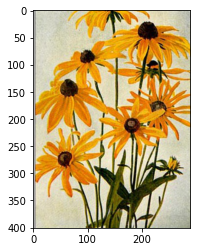

In [ ]:
show_example(*dataset[3000])

Class:  car (1)


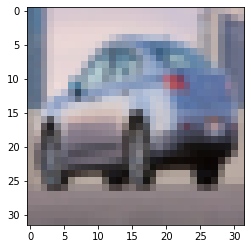

In [ ]:
show_example(*dataset_2[600])

## Training and Validation Datasets:

It's an approach to split the base dataset into 3 groups - training, validation and testing datasets to build Machine Learning/Deep Learning predictive models.

- **Training dataset**: This is used to train the model i.e., to compute the loss and adjust the weights of model using Gradient Descent.
- **Validation dataset**: It is used to evaluate the model while training it. And adjust the hyperparameters such as learning rate, batch size etc. This evaluation helps to select the best version of the model.
- **Test dataset**: Used to check and compare different models and an another approach and helps to get the final accuracy of the model.

Since there's no predefined validation set, we can set aside a small portion of the training set to be used as the validation set. We'll use the random_split helper method from PyTorch to do this. To ensure that we always create the same validation set, we'll also set a seed for the random number generator.

In [ ]:
random_seed = 42
torch.manual_seed(random_seed)

In [ ]:
type(dataset)

torchvision.datasets.folder.ImageFolder

In [ ]:
val_percentage = 0.15
val_size = int(len(dataset) * val_percentage)
val_size

828

In [ ]:
len(dataset_2)

5526

In [ ]:
train_size = len(dataset) - val_size
train_size

4698

In [ ]:
training_ds, validation_ds = random_split(dataset, [train_size, val_size])

len(training_ds), len(validation_ds)

(4698, 828)

In [ ]:
training_ds_2, validation_ds_2 = random_split(dataset_2, [train_size, val_size])

len(training_ds_2), len(validation_ds_2)

(4698, 828)

Important parameters such as dataset url, validation size and random seeds canbe logged into Jovian.

- To load the data in batches, we can use the DataLoader class from PyTorch for training and validation.

In [ ]:
from torch.utils.data.dataloader import DataLoader

batch_size = 128

In [ ]:
training_dl = DataLoader(training_ds, batch_size, shuffle=True, num_workers=True, pin_memory=True)
validation_dl = DataLoader(validation_ds, batch_size*2, num_workers=4, pin_memory=True)

In [ ]:
training_dl_2 = DataLoader(training_ds_2, batch_size, shuffle=True, num_workers=True, pin_memory=True)
validation_dl_2 = DataLoader(validation_ds_2, batch_size*2, num_workers=4, pin_memory=True)

In [ ]:
from torchvision.utils import make_grid

def display_batch(dl):
  for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

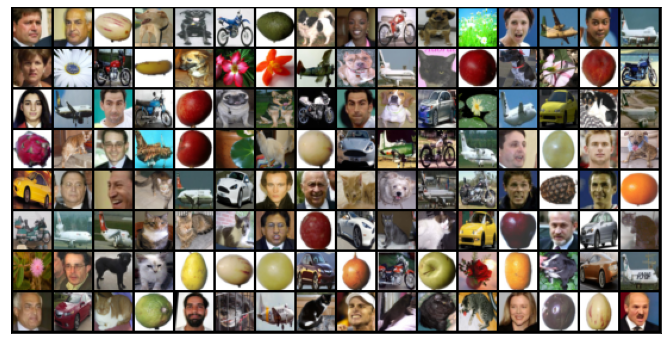

In [ ]:
display_batch(training_dl_2)

## Brief concepts about CNN (Convolutional Neural Network):

**Definition**:
- CNN, it's a type of Neural Network, used for building prediction models. In this project I have used Python to develope predictive modelling and training the same.
- CNN architecture consists of multiple convolutional layers.
- CNN technology is used for building Machine Learning/Deep Learning predictive models based on the type and size of the data.
- Based on type of datasets such as 2D images, 1D data such as words and texts and 3D datasets such as videos, CNN architecture will be defined and trained for the prediction purpose.

**Building blocks of CNN architecture**: While building CNN predictive models, it requires Data Preperation such as 'standardizing the input data' meaning ensuring the images (inputs) are all same size.
In the dataset I have chosen for this project has got images with varied size thus in the above code cells, I have transformed all the image tensors into standard size 224 X 224 and saved them into 'dataset_2' variable.
- Convolutional layers
- Pooled layers
- Fully-Connected layers

**Use Cases**:
CNN algorithm can be used for the following scenarios.
- Image Classification
- Time Series Forecasting
- Computer Vision (Object Detection) tasks
- It's also used for some of the NLP tasks

**Terminologies**:
- *Receptive Field Size* = It's a patch and it's size should be minimum 3X3 (common size) and be able to view the features of input data. It's size can be configured to 5X5 or 7X7 based on the input size.
- *Stride width* = The default stride width is 1, this can be increased to 2 if the input size is large.
- *Pooling* = it's a generalization process to reduce the over-fitting.
- *Padding* = It will be set to zero, when reading non-input data.
- *Kernel* = It's basically a matrix of weights.

**To read more** on the CNN and its architecture: 
- https://machinelearningmastery.com/crash-course-convolutional-neural-networks/
- https://sgugger.github.io/convolution-in-depth.html

Below is the image illustrates the main layers of CNN architecture.

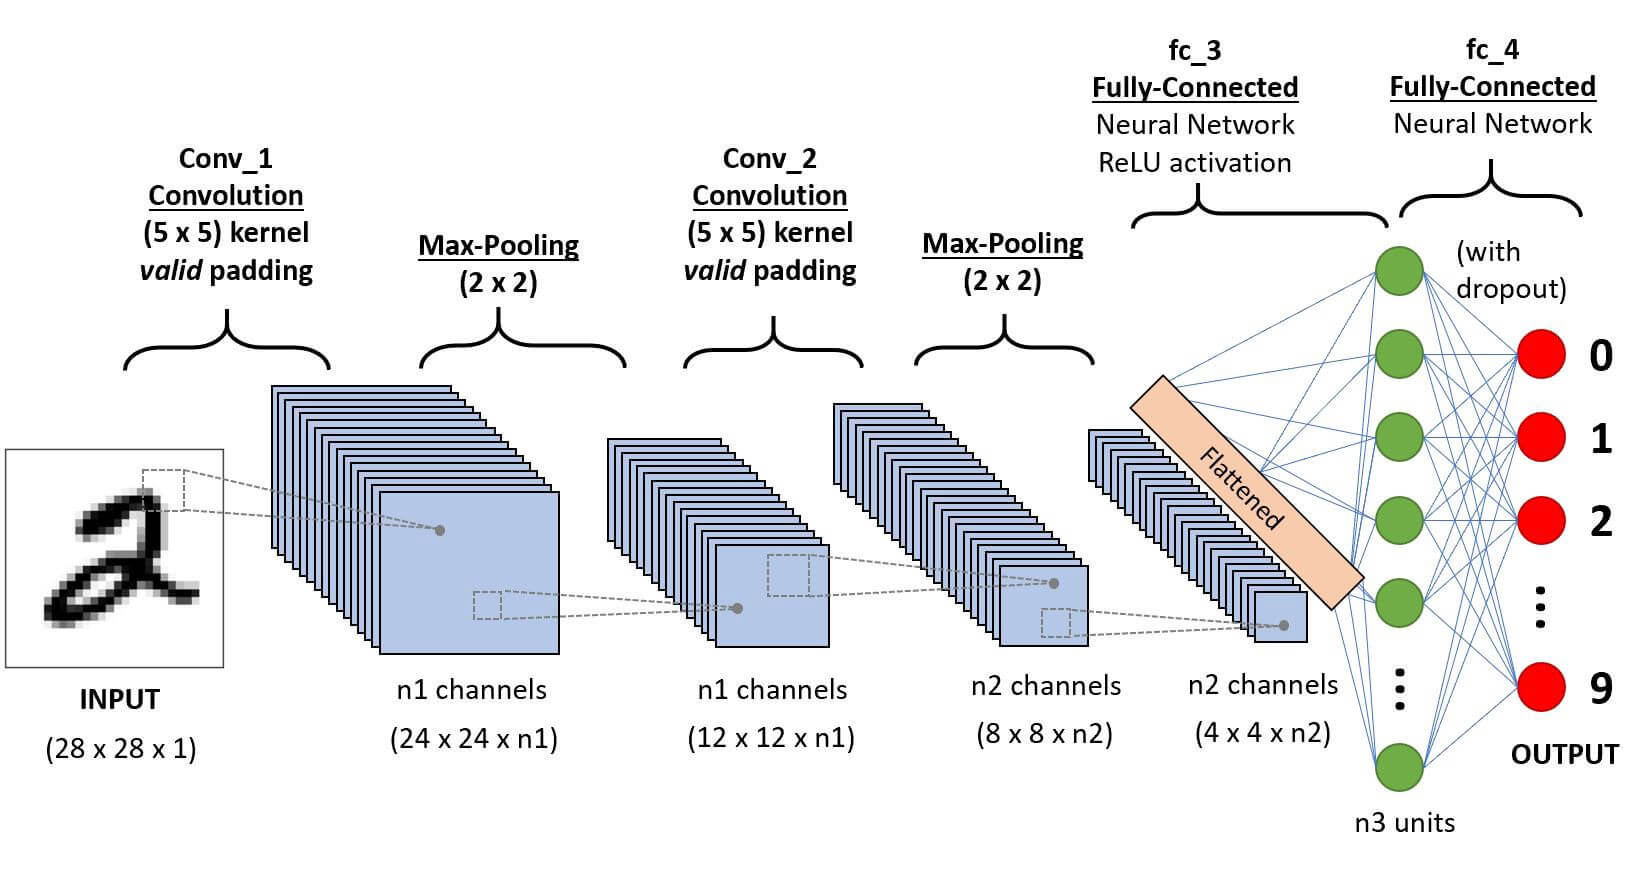

## To define the Predictive Model using CNN algorithm:

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

Note:
- To understand the set of Convolution layer and Pooling layer individually when applied through NN's Sequential class.

In [ ]:
sample_model = nn.Sequential(
    nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1),
    nn.MaxPool2d(2, 2)
)

In [ ]:
for images, labels in training_dl_2:
    print('images.shape:', images.shape)
    out = sample_model(images)
    print('out.shape:', out.shape)
    break

images.shape: torch.Size([128, 3, 32, 32])
out.shape: torch.Size([128, 8, 16, 16])


- Below is the basic class which contains helper functions which helps in training and validation.
- This class will extend the Module class from Neural Network (nn) from PyTorch.

In [ ]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

Below using the nn.Sequential to chain the convolution & pooling layers with activation functions into a single network architecture.


In [ ]:
class NaturalImagesModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 16 x 16

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 4 x 4

            nn.Flatten(), 
            nn.Linear(256*4*4, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 10))
        
    def forward(self, xb):
        return self.network(xb)

In [ ]:
model = NaturalImagesModel()
model

NaturalImagesModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_f

This is to verify if the model produces the expected prediction/output:

In [ ]:
for images, labels in training_dl_2:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([128, 3, 32, 32])
out.shape: torch.Size([128, 10])
out[0]: tensor([ 0.0207, -0.0177,  0.0454,  0.0284, -0.0267,  0.0350, -0.0211,  0.0251,
         0.0271,  0.0312], grad_fn=<SelectBackward>)


To use GPU seamlessly, if one is available, we define a couple of helper functions (get_default_device & to_device) and a helper class DeviceDataLoader to move our model & data to the GPU as required. 

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

Check if it's a GPU or CPU device:

In [ ]:
device = get_default_device()
device

device(type='cuda')

Now we can wrap our training and validation data loaders using DeviceDataLoader for automatically transferring batches of data to the GPU (if available), and use to_device to move our model to the GPU (if available).

In [ ]:
train_dl_2 = DeviceDataLoader(training_dl_2, device)
val_dl_2 = DeviceDataLoader(validation_dl_2, device)
to_device(model, device);

## Training the Model:
Here defining two functions: 'fit' and 'evaluate' to train the model using gradient descent and evaluate its performance on the validation set

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

Instantiate the model once again after moving the device type to be GPU.

In [ ]:
model = to_device(NaturalImagesModel(), device)

Evaluate the model using validation dataset:

In [ ]:
evaluate(model, val_dl_2)

{'val_acc': 0.12682291865348816, 'val_loss': 2.297912120819092}

The initial accuracy is around 12%, which could be expected from a randomly intialized model (since it has a 1 in 10 chance of getting a label right by guessing randomly).

Use the following hyperparmeters (learning rate, no. of epochs, batch_size etc.) to train the model.


In [ ]:
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.001

Logging the hyperparameters for later access while comparing the experiments and previous versions & hyperparameters.

In [ ]:
jovian.reset()
jovian.log_hyperparams({
    'num_epochs': num_epochs,
    'opt_func': opt_func.__name__,
    'batch_size': batch_size,
    'learning_rate': lr,
})

[jovian] Hyperparams logged.


Training the model with above defined hyper-params:

In [ ]:
history = fit(num_epochs, lr, model, train_dl_2, val_dl_2, opt_func)

Epoch [0], train_loss: 2.0203, val_loss: 1.7197, val_acc: 0.4020
Epoch [1], train_loss: 1.3156, val_loss: 1.0916, val_acc: 0.6061
Epoch [2], train_loss: 0.8599, val_loss: 0.8046, val_acc: 0.6965
Epoch [3], train_loss: 0.6713, val_loss: 0.6187, val_acc: 0.7527
Epoch [4], train_loss: 0.5218, val_loss: 0.5946, val_acc: 0.7752
Epoch [5], train_loss: 0.4614, val_loss: 0.4805, val_acc: 0.8158
Epoch [6], train_loss: 0.3827, val_loss: 0.4687, val_acc: 0.8275
Epoch [7], train_loss: 0.3076, val_loss: 0.4726, val_acc: 0.8554
Epoch [8], train_loss: 0.2434, val_loss: 0.4434, val_acc: 0.8262
Epoch [9], train_loss: 0.2169, val_loss: 0.4393, val_acc: 0.8458


Logging above training metric:

In [ ]:
# jovian.log_metrics(train_loss=history[-1]['train_loss'], 
#                    val_loss=history[-1]['val_loss'], 
#                    val_acc=history[-1]['val_acc'])

[jovian] Metrics logged.


To plot the validation set accuracy:

In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('val_accuracy')
    plt.title('Accuracy vs. No. of epochs');

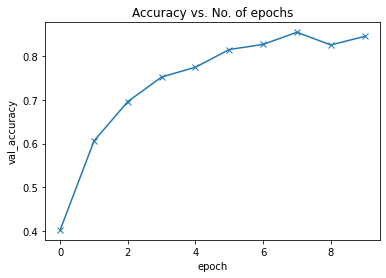

In [ ]:
plot_accuracies(history)

From the above training, it shows that accuracy dropped to 82% at 9th epoch and picked it up to 84% in the 10th epoch.
This suggests that we might need to use a more powerful model to capture the relationship between the images and the labels more accurately. This can be done by adding more convolutional layers to our model, or incrasing the no. of channels in each convolutional layer, or by using regularization techniques.

To plot the training and validation losses:

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. Each epochs');

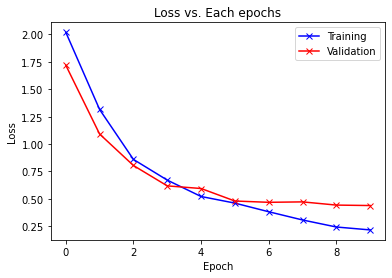

In [ ]:
plot_losses(history)

Note:
- From the above observations, at some point validation loss is more than training loss.
- This phenomenon is called overfitting, this is the main reason why many machine learning models give rather wrong results on real-world data. It happens because the model, in an attempt to minimize the loss, starts to memorize/learn patterns which are unique to the training data, sometimes even memorizing specific training examples. Because of this, the model does not generalize well to previously unseen/new dataset.

Following are some common stragegies for avoiding overfitting:

- Gathering and generating more training data, or adding noise to it.
- Using regularization techniques like batch normalization & dropout.
- Early stopping of model's training, when validation loss starts to increase.



## Testing the above model with individual input from Testing dataset:

Define a helper function 'predict_image', which returns the predicted label for a single image tensor.


In [ ]:
test_dataset = ImageFolder('natural-images/natural_images', transform=transforms.Compose([transforms.Resize(img_size), transforms.ToTensor()]))

In [ ]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

Label: airplane , Predicted: airplane


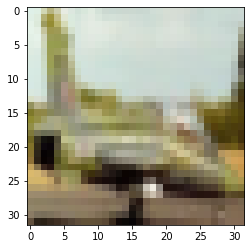

In [ ]:
# Predict first input's label from test_dataset:

img, label = test_dataset[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: car , Predicted: car


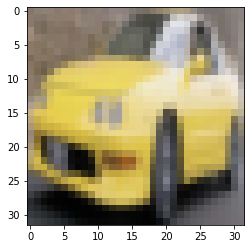

In [ ]:
# Predict 900th input of test_dataset:

img, label = test_dataset[900]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: car , Predicted: car


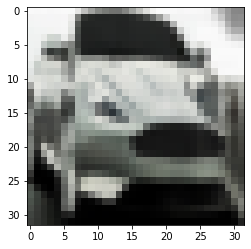

In [ ]:
# To predict 1200th input of test_dataset:

img, label = test_dataset[1200]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: cat , Predicted: cat


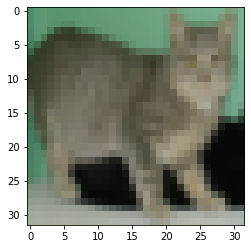

In [ ]:
# To predict 1376th input of test_dataset:

img, label = test_dataset[1376]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: airplane , Predicted: airplane


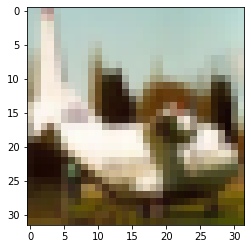

In [ ]:
# To predict 3rd input from test_dataset:

img, label = test_dataset[3]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

To Evaluate test_dataset for its accuracy:

In [ ]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size*2), device)
result = evaluate(model, test_loader)
result

{'val_acc': 0.9415624737739563, 'val_loss': 0.19205546379089355}

To log the above metrics of test_dataset:

In [ ]:
# jovian.log_metrics(test_loss=result['val_loss'], test_acc=result['val_acc'])

[jovian] Metrics logged.


## Saving and Loading the model

After training the model and achieved a resonable accuracy, it would be a good idea to save the weights of the model to disk, so that we can reuse the model later and avoid retraining from scratch.

In [ ]:
torch.save(model.state_dict(), 'natural_images_cnn_model.pth')

The .state_dict method returns an OrderedDict containing all the weights and bias matrices mapped to the right attributes of the model. To load the model weights, we can redefine the model with the same structure, and use the .load_state_dict method.

In [ ]:
model_2 = to_device(NaturalImagesModel(), device)

To sanity check, if the above redefined model_2 has the same loss & accuracy for test dataset:

In [ ]:
evaluate(model_2, test_loader)

{'val_acc': 0.11931817978620529, 'val_loss': 2.2957308292388916}

In [ ]:
# jovian.commit(project='cnn-img-classification-pytorch')

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/rn021215/cnn-img-classification-pytorch


'https://jovian.ai/rn021215/cnn-img-classification-pytorch'

## Summary:

- This is the predictive model I worked on from the scratch to predict the natural images from the above mentioned dataset from Kaggle (https://www.kaggle.com/prasunroy/natural-images)
- This model can be further improvized on reaching the higher accuracy for prediction.
- This notebook is a good starter point for building the predictive model for Image Classification tasks.
- New, similar dataset can be replaced in this notebook to further explore on training the model for Image Classification.

- Below are some of the tips to configure Google drive to the Google Colab if the notebook used for several times especially when the runtime ends and to save the datasets to-and-from to continue working.

- This was my project on building and training the prediction model for image classification/identification and I have worked on similar projects from the course I have taken @ https://jovian.ai/learn/deep-learning-with-pytorch-zero-to-gans

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

# To unmount the drive once finished with synchronization:
# drive.flush_and_unmount()

In [ ]:
# To change the current directory:
# %cd /content/gdrive/MyDrive/folder_name

In [ ]:
# To check the current directory:
# pwd

In [ ]:
# Copy from Gdrive to Colab:
# !cp -r '/content/gdrive/MyDrive/folder_name' '/content/natural-images'

In [ ]:
# Copy from Colab to Gdrive:
# !cp -r '/content/natural-images' '/content/gdrive/MyDrive/folder_name'

In [ ]:
# To delete nested folder:
# %rm -rf '/content/natural-images-archive'